# October 18 - r/leafs Fantasy Hockey Standings Analysis

I wanted to take a closer look at variables that affect the rankings in the league, and maybe learn from them to create a strategy. It's still quite early in the season, so we would have to be careful in making claims too emphatically.

In [1]:
# importing the standard data analysis tools for working with & visualzing data in python
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord,"aesthetics")))
%matplotlib inline

In [2]:
# I haven't automated the data scraping yet, just downloaded the table into excel from Yahoo
df = pd.read_csv('data-files/2017-10-19.csv')

In [3]:
# Renaming the columns for clarity
df.rename(columns={'GP*.1': 'GoalieGP', 'GP*': 'PlayerGP'}, inplace=True)
df

,Actual Rank,Rank,Team Name,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK,GoalieGP,W,GAA,SA,SV%,SHO
0,1,20,/u/Hotwired38,84,18,53,22,74,26,2,193,343,110,63,8,6,1.75,254,0.945,1
1,2,19,/u/Dangled0re,106,24,36,-4,74,20,1,219,273,123,84,10,8,2.78,299,0.913,1
2,3,18,/u/canadaq,101,29,37,10,69,21,4,243,188,142,67,10,2,2.99,270,0.904,1
3,4,17,/u/BuffaloSobbers1,98,24,28,-7,49,22,2,238,338,125,82,13,9,3.17,427,0.904,1
4,5,16,/u/crayfishparty2,102,16,43,-15,34,22,1,249,200,119,60,10,8,1.69,332,0.949,1
5,6,15,/u/joey3140,104,23,52,5,45,26,2,219,136,91,73,9,5,2.70,274,0.916,1
6,6,15,/u/scomar201,103,24,39,17,53,22,1,189,267,78,86,9,4,1.67,213,0.944,1
7,8,13,/u/xskilledsnipax,110,27,44,3,54,20,3,264,38,111,93,11,4,3.10,307,0.902,0
8,8,13,/u/xprmnts,105,23,43,24,55,9,2,254,199,124,74,9,7,3.00,291,0.907,0
9,10,11,/u/TheManagement,98,24,28,-2,49,12,0,215,198,139,101,11,5,2.28,315,0.924,1


In [4]:
# Seperated Player vs. Goalie data
df_players = df[['Rank', 'Team Name', 'PlayerGP', 'G', 'A', '+/-', 'PIM', 'PPP', 'SHP', 'SOG', 'FW', 'HIT', 'BLK']]
df_goalies = df[['Rank', 'Team Name', 'GoalieGP', 'W', 'GAA', 'SA', 'SV%', 'SHO']]

In [5]:
df_goalies.describe()

,Rank,GoalieGP,W,GAA,SA,SV%,SHO
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.600000,8.450000,4.250000,2.846000,250.200000,0.910450,0.500000
std,5.968338,2.235479,2.531382,0.721741,73.065652,0.020315,0.512989
min,1.000000,3.000000,0.000000,1.670000,88.000000,0.870000,0.000000
25%,5.750000,7.000000,2.000000,2.545000,208.000000,0.900500,0.000000
50%,10.500000,9.000000,4.000000,2.895000,252.500000,0.911500,0.500000
75%,15.250000,10.000000,6.000000,3.182500,293.000000,0.917500,1.000000
max,20.000000,13.000000,9.000000,4.780000,427.000000,0.949000,1.000000


In [6]:
#df_goalies.median()

In [7]:
df_goalies_sorted_bySA = df_goalies.sort_values('SA', ascending=False)
df_goalies_sorted_byGP = df_goalies.sort_values('GoalieGP', ascending=False)
df_goalies_sorted_bySVP = df_goalies.sort_values('SV%', ascending=False)
df_goalies_sorted_byGAA = df_goalies.sort_values('GAA', ascending=False)
df_goalies_sorted_byW = df_goalies.sort_values('W', ascending=False)


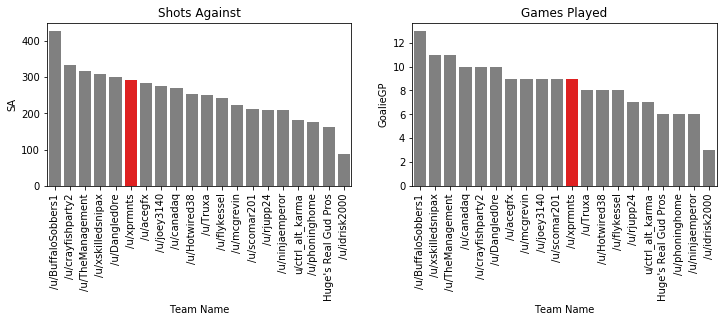

In [8]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_bySA['Team Name']]
sns.barplot(x='Team Name', y='SA', data=df_goalies_sorted_bySA, palette=clrs, ax=ax1)
ax1.set_title('Shots Against')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    
clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_byGP['Team Name']]
sns.barplot(x='Team Name', y='GoalieGP', data=df_goalies_sorted_byGP, palette=clrs2, ax=ax2)
ax2.set_title('Games Played')
for item in ax2.get_xticklabels():
    item.set_rotation(90)


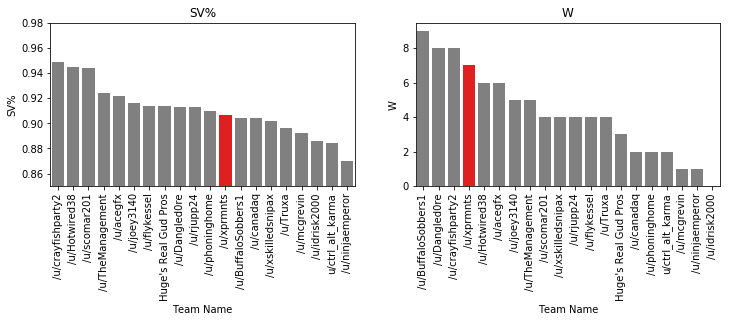

In [9]:
fig,(ax3,ax4) = plt.subplots(ncols=2, figsize=(12,3))
clrs3 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_bySVP['Team Name']]
sns.barplot(x='Team Name', y='SV%', data=df_goalies_sorted_bySVP, palette=clrs3, ax=ax3)
for item in ax3.get_xticklabels():
    item.set_rotation(90)
ax3.set_title('SV%')
ax3.set_ylim([.85,.98])

clrs4 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_byW['Team Name']]
sns.barplot(x='Team Name', y='W', data=df_goalies_sorted_byW, palette=clrs4, ax=ax4)
for item in ax4.get_xticklabels():
    item.set_rotation(90)
ax4.set_title('W')

In [10]:
# Examining the correlation in statistics for goalies
df_goalies_corr = df_goalies.corr()
df_goalies_corr.sort_values('Rank', ascending=False)

,Rank,GoalieGP,W,GAA,SA,SV%,SHO
Rank,1.000000,0.704537,0.728084,-0.630002,0.677277,0.678752,0.618853
W,0.728084,0.695231,1.000000,-0.472445,0.820105,0.584154,0.425569
GoalieGP,0.704537,1.000000,0.695231,-0.275124,0.937746,0.349948,0.481900
SV%,0.678752,0.349948,0.584154,-0.955125,0.327931,1.000000,0.467167
SA,0.677277,0.937746,0.820105,-0.199354,1.000000,0.327931,0.429681
SHO,0.618853,0.481900,0.425569,-0.415088,0.429681,0.467167,1.000000
GAA,-0.630002,-0.275124,-0.472445,1.000000,-0.199354,-0.955125,-0.415088


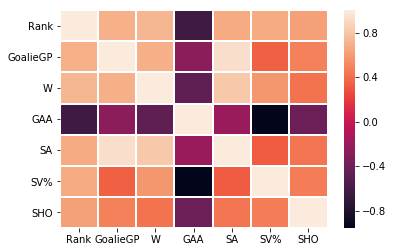

In [11]:
sns.heatmap(df_goalies.corr(), linewidths=1)

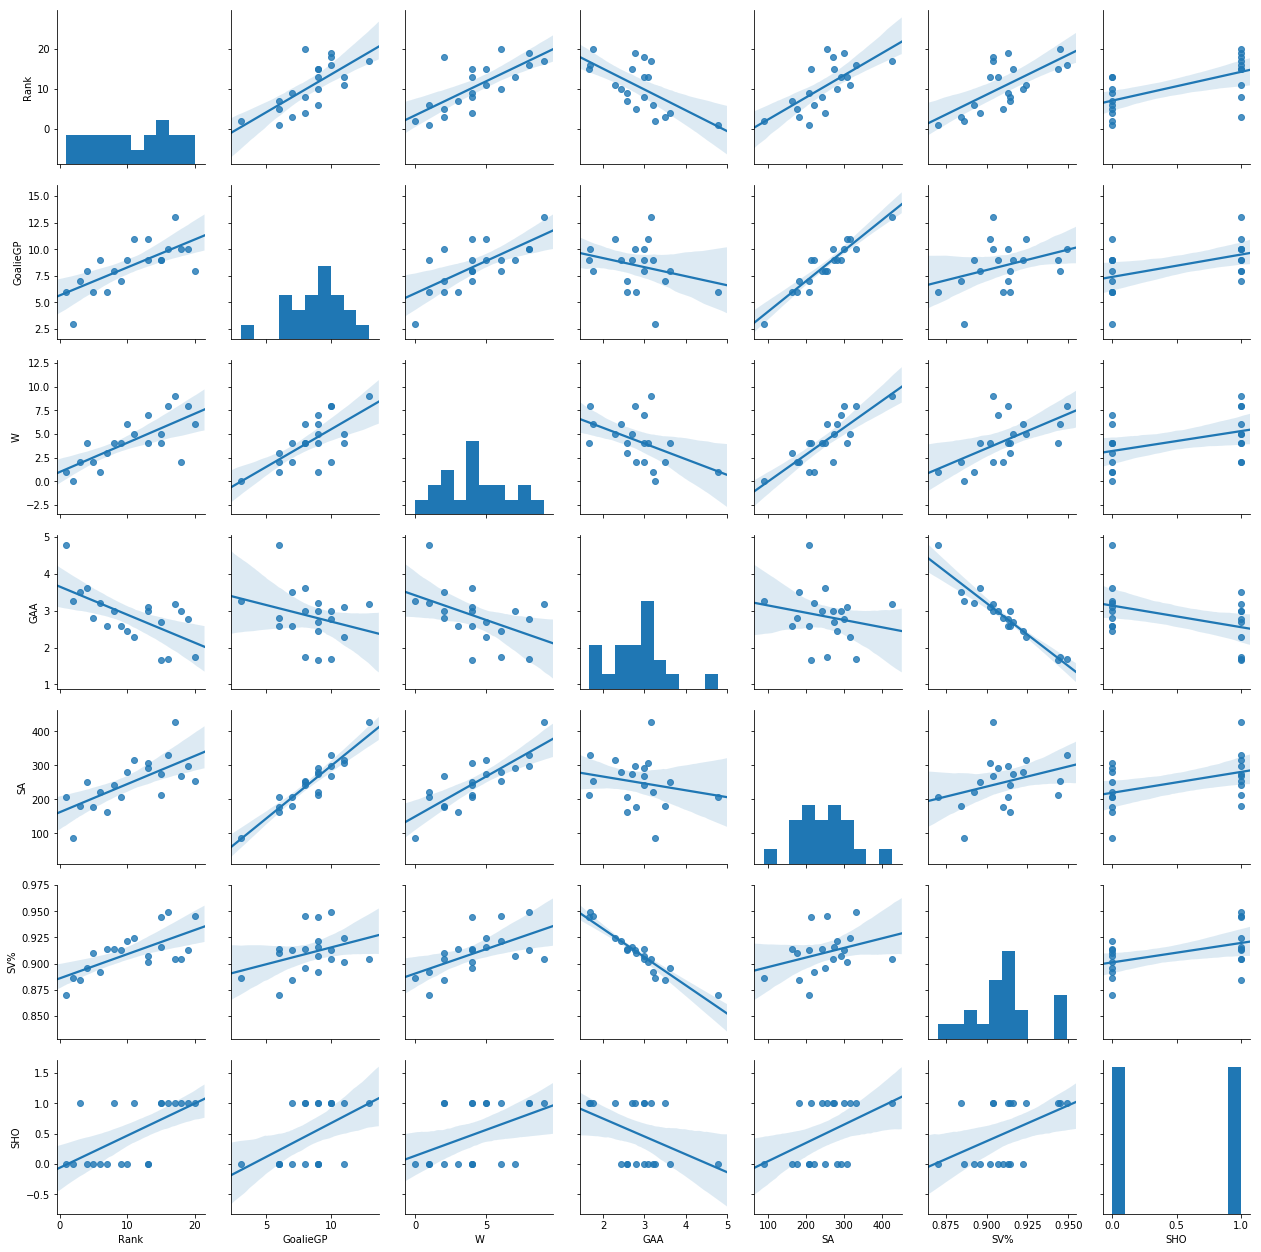

In [12]:
sns.pairplot(data=df_goalies,kind='reg')

### Goalie effects

After examining the tables and plots above we can come to a few conclusions:
1. All the goalie stats are positively corrolated, the most important however are Wins, Shots Against and Games Played (althought games played isn't a stat but tells us that it is indirectly corrolated with other stats)
2. Shot's Against has the strongest correlation with GamesPlayed - which is common sense and is nicely corroborated by the data - this indicates that I should try to increase the volume of games played for my Goalies.

My predicament when I joined the league was that I did not pick good goalies during the draft, so I am left with scraps, but based on the data above it turns out the most important factor (SA) in influencing rank can be manipulated easily despite my poor goalie selection during the draft. I can try to pick up goalies in free agency and cycle through them based on their upcoming schedule (add them before they are likely to play and drop them promptly after they play). It remains to be seen how wins & save % will shake out as the rest of the season goes. Might have to re-evaluate this strategy after a certain point and perhaps trade for a goalie that might have better win and save % stats.

In [13]:
df_players.describe()

,Rank,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK
count,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.600000,97.650000,22.400000,37.300000,-1.1000,56.450000,18.600000,1.450000,214.750000,215.550000,107.350000,73.050000
std,5.968338,8.151687,4.649844,8.046575,15.1237,17.077147,5.072112,1.145931,28.964361,80.341688,27.534237,16.860027
min,1.000000,81.000000,13.000000,26.000000,-28.0000,24.000000,9.000000,0.000000,152.000000,38.000000,60.000000,44.000000
25%,5.750000,91.000000,19.000000,30.750000,-11.5000,48.000000,15.500000,0.750000,192.500000,184.000000,88.500000,62.250000
50%,10.500000,100.000000,23.500000,36.500000,-0.5000,55.500000,20.000000,1.500000,216.500000,199.500000,108.500000,72.000000
75%,15.250000,104.000000,24.250000,43.000000,9.2500,68.250000,22.000000,2.000000,238.750000,268.500000,124.250000,84.500000
max,20.000000,110.000000,32.000000,53.000000,24.0000,93.000000,26.000000,4.000000,264.000000,345.000000,152.000000,108.000000


In [14]:
df_players.median()

Rank         10.5
PlayerGP    100.0
G            23.5
A            36.5
+/-          -0.5
PIM          55.5
PPP          20.0
SHP           1.5
SOG         216.5
FW          199.5
HIT         108.5
BLK          72.0
dtype: float64

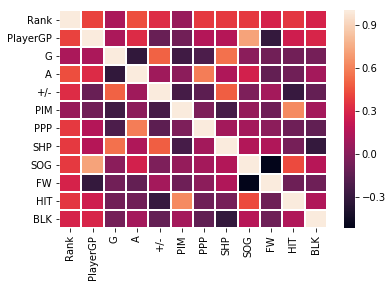

In [15]:
sns.heatmap(df_players.corr(), linewidths=1)

In [16]:
df_players_corr = df_players.corr()

In [17]:
df_players_corr.sort_values('Rank', ascending=False)

,Rank,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK
Rank,1.000000,0.405890,0.125549,0.438810,0.328979,0.065891,0.373455,0.373999,0.373876,0.290364,0.366648,0.285266
A,0.438810,0.321038,-0.315660,1.000000,0.088488,0.020032,0.589852,0.138702,0.275167,-0.127517,-0.076516,0.101915
PlayerGP,0.405890,1.000000,0.127469,0.321038,-0.111297,-0.074047,0.155554,0.164240,0.716274,-0.303785,0.255701,0.298834
SHP,0.373999,0.164240,0.547217,0.138702,0.488636,-0.231432,0.095985,1.000000,0.154210,0.147520,-0.056965,-0.306330
SOG,0.373876,0.716274,0.017976,0.275167,-0.030098,0.053868,0.103536,0.154210,1.000000,-0.513487,0.428223,0.170637
PPP,0.373455,0.155554,-0.209325,0.589852,-0.148065,-0.030625,1.000000,0.095985,0.103536,0.022137,-0.084493,-0.134539
HIT,0.366648,0.255701,-0.075558,-0.076516,-0.293391,0.628039,-0.084493,-0.056965,0.428223,-0.091168,1.000000,0.147234
+/-,0.328979,-0.111297,0.500549,0.088488,1.000000,-0.237023,-0.148065,0.488636,-0.030098,0.105695,-0.293391,-0.122380
FW,0.290364,-0.303785,-0.075008,-0.127517,0.105695,-0.084891,0.022137,0.147520,-0.513487,1.000000,-0.091168,-0.086590
BLK,0.285266,0.298834,-0.059347,0.101915,-0.122380,0.107221,-0.134539,-0.306330,0.170637,-0.086590,0.147234,1.000000


In [18]:
df_players_sorted_byPlayerGP = df_players.sort_values('PlayerGP', ascending=False)
df_players_sorted_byG = df_players.sort_values('G', ascending=False)
df_players_sorted_byA = df_players.sort_values('A', ascending=False)
df_players_sorted_byPM = df_players.sort_values('+/-', ascending=False)
df_players_sorted_byPIM = df_players.sort_values('PIM', ascending=False)
df_players_sorted_byPPP = df_players.sort_values('PPP', ascending=False)
df_players_sorted_bySHP = df_players.sort_values('SHP', ascending=False)
df_players_sorted_bySOG = df_players.sort_values('SOG', ascending=False)
df_players_sorted_byHIT = df_players.sort_values('HIT', ascending=False)
df_players_sorted_byBLK = df_players.sort_values('BLK', ascending=False)
df_players_sorted_byFW = df_players.sort_values('FW', ascending=False)

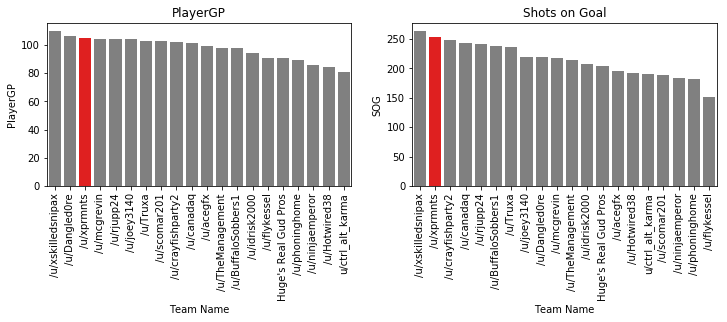

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byPlayerGP['Team Name']]
sns.barplot(x='Team Name', y='PlayerGP', data=df_players_sorted_byPlayerGP, palette=clrs, ax=ax1)
ax1.set_title('PlayerGP')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_bySOG['Team Name']]
sns.barplot(x='Team Name', y='SOG', data=df_players_sorted_bySOG, palette=clrs2, ax=ax2)
ax2.set_title('Shots on Goal')
for item in ax2.get_xticklabels():
    item.set_rotation(90)
    

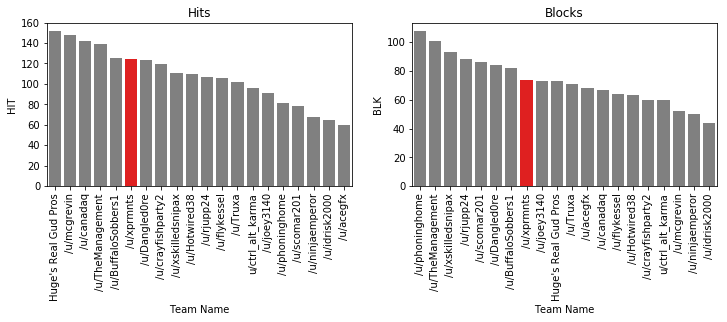

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='HIT', data=df_players_sorted_byHIT, palette=clrs, ax=ax1)
ax1.set_title('Hits')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byBLK['Team Name']]
sns.barplot(x='Team Name', y='BLK', data=df_players_sorted_byBLK, palette=clrs2, ax=ax2)
ax2.set_title('Blocks')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

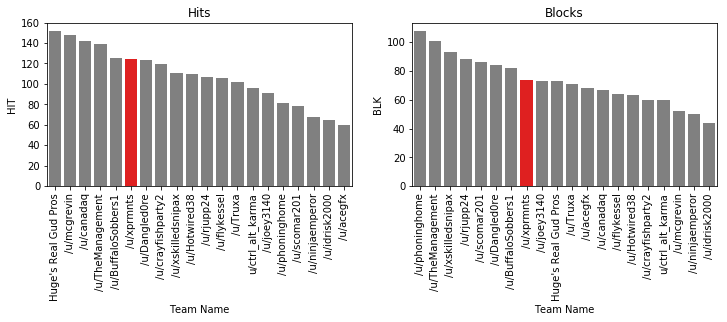

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='HIT', data=df_players_sorted_byHIT, palette=clrs, ax=ax1)
ax1.set_title('Hits')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byBLK['Team Name']]
sns.barplot(x='Team Name', y='BLK', data=df_players_sorted_byBLK, palette=clrs2, ax=ax2)
ax2.set_title('Blocks')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

In [22]:
#df.corr().sort_values('Rank', ascending=False)

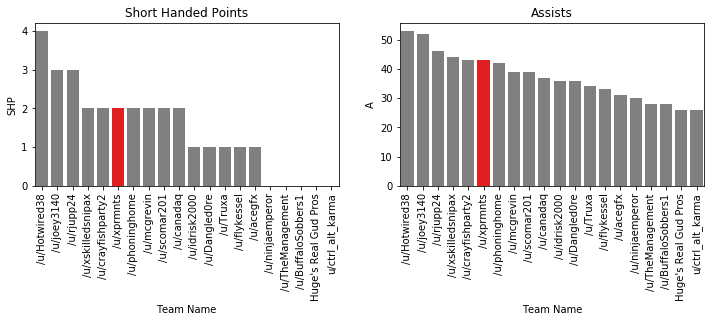

In [23]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), sharex=True)

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='SHP', data=df_players_sorted_bySHP, palette=clrs, ax=ax1)
ax1.set_title('Short Handed Points')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byA['Team Name']]
sns.barplot(x='Team Name', y='A', data=df_players_sorted_byA, palette=clrs2, ax=ax2)
ax2.set_title('Assists')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

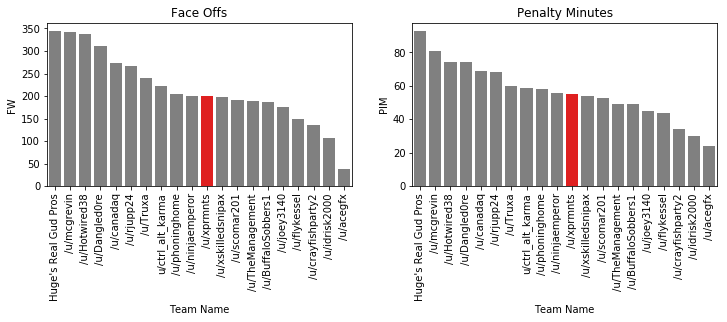

In [24]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), sharex=True)

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byFW['Team Name']]
sns.barplot(x='Team Name', y='FW', data=df_players_sorted_byFW, palette=clrs, ax=ax1)
ax1.set_title('Face Offs')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byPIM['Team Name']]
sns.barplot(x='Team Name', y='PIM', data=df_players_sorted_byPIM, palette=clrs2, ax=ax2)
ax2.set_title('Penalty Minutes')
for item in ax2.get_xticklabels():
    item.set_rotation(90)